In [1]:
import re
import requests
import pandas as pd
from math import ceil
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_rows', 9999)

In [2]:
res = requests.get("https://www.gutenberg.org/files/832/832-h/832-h.htm")
robin_hood = res.text

In [3]:
robin_hood = re.sub(r'\n', ' ', robin_hood)
robin_hood = re.sub(r'<.*?>', "", robin_hood)
robin_hood = re.sub(r'CHAPTER \w+', '', robin_hood)
robin_hood = robin_hood.lower()

In [4]:
robin_hood.index('how robin hood became an outlaw')

2389

In [5]:
robin_hood.index('end of the project gutenberg ebook')

387266

In [6]:
# I'm creating this list in case I need to do something with the contractions, Not sure how or if I'll use it yet
contraction_list = re.findall(r'\w+\'\w+', robin_hood[2389:387266])

In [7]:
word_list = re.findall(r'[a-z]+', robin_hood[2389:387266])

In [8]:
word_count = Counter(word_list)

In [9]:
word_count_df = pd.DataFrame.from_dict({"Word_occurance": pd.Series(word_count)})
word_count_df = word_count_df.sort_values(by=['Word_occurance'], ascending=False)

In [10]:
word_count_df['Zipf_number'] = 1
for row in range(len(word_count_df)):
    word_count_df['Zipf_number'][row] = ceil(1/(row + 1) * word_count_df.Word_occurance[0])

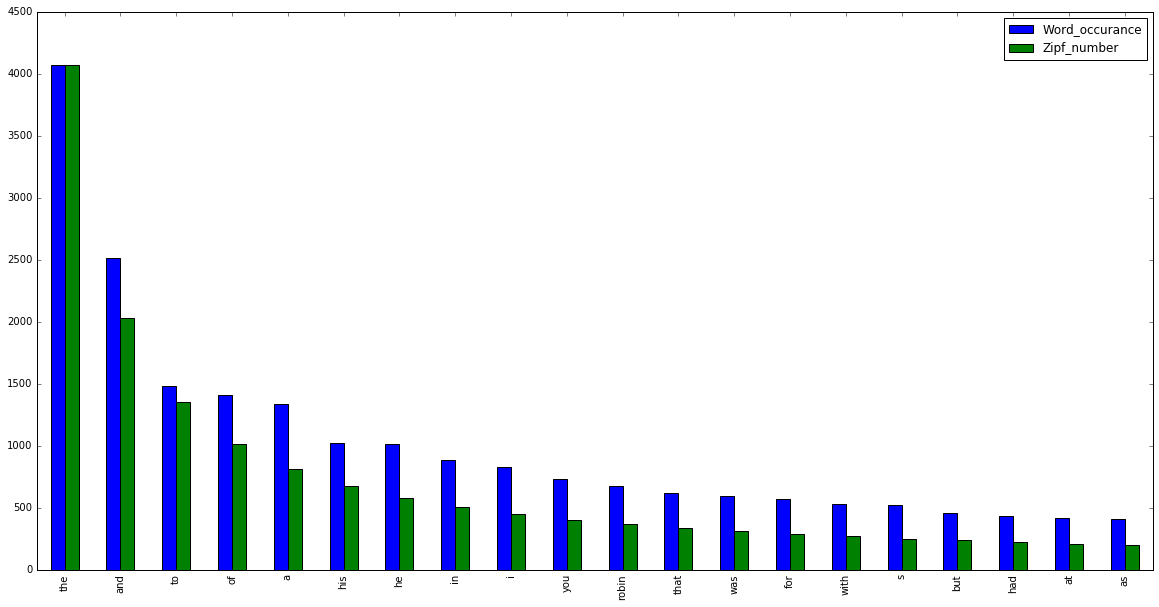

In [11]:
word_count_df.head(20).plot(kind='bar', figsize=(20,10))

In [12]:
word_count_df

,Word_occurance,Zipf_number
the,4071,4071
and,2520,2036
to,1488,1357
of,1416,1018
a,1339,815
his,1029,679
he,1014,582
in,888,509
i,831,453
you,736,408
